# Package installation

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from folium import plugins
from plotly.subplots import make_subplots
import folium
import matplotlib as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from folium.plugins import HeatMap
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator 
from PIL import Image
from operator import itemgetter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import *
from bokeh.models import ColumnDataSource, HoverTool
import nltk
nltk.download('wordnet')
import stylecloud
import re
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.palettes import magma, viridis
from folium import plugins
from bokeh.models import ColumnDataSource, HoverTool, FactorRange, Legend
from bokeh.io import output_file, show, output_notebook, push_notebook

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/helenehjort/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Data

https://www.kaggle.com/datasets/justinas/startup-investments?select=funds.csv

**acquisitions.csv:** information about startups that have been bought (price and time)

**degrees.csv:** the education backgrounds of individuals involved in the startup world.

**funding_rounds.csv:** information about startup funding rounds (amounts of founds, dates, founding, the founder)

**funds.csv:** data on the venture capital funds that make investments.

**investments.csv:** data on the various different investments made by venture capitalists.

**ipos.csv:** data on initial public offerings (stock name)

**milestones.csv:** events within the startup ecosystem. (Milestone description)

**objects.csv:** Main file containing base information. (Name, category, status)

**offices.csv:** information about startup company offices (latitude and longitude)

**people.csv:** information about individuals in the startup world.

**relationships.csv:** relationship data that links companies to individuals and their positions.

In [2]:

acquisitions = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/acquisitions.csv")
degrees = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/degrees.csv")
funding_rounds = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/funding_rounds.csv")
founds = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/funds.csv")
investments = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/investments.csv")
ipos = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/ipos.csv")
milestones = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/milestones.csv")
objects = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/objects.csv")
offices = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/offices.csv")
people = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/people.csv")
relationships = pd.read_csv("/Users/helenehjort/Library/Mobile Documents/com~apple~CloudDocs/Business Analytics/8. Semester/02806 Social data analysis/Project/Data/relationships.csv")


/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/4177267388.py:8: DtypeWarning:

Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
"""
acquisitions = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/acquisitions.csv")
degrees = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/degrees.csv")
funding_rounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funding_rounds.csv")
founds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funds.csv")
investments = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/investments.csv")
ipos = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/ipos.csv")
milestones = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/milestones.csv")
objects = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/objects.csv")
offices = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/offices.csv")
people = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/people.csv")
relationships = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/relationships.csv")
"""

'\nacquisitions = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/acquisitions.csv")\ndegrees = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/degrees.csv")\nfunding_rounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funding_rounds.csv")\nfounds = pd.read_csv("/Users/kathrinesofierasmussen/Library/CloudStorage/GoogleDrive-rasmussen.kathrine20@gmail.com/Mit drev/DTU/M.Sc./2. Semester/02806 Social Data Analysis and  Visualization /Assignments/ProjectData/funds.csv")\ninvestments = pd.read_csv("/Users/kathri

In [4]:
"""
acquisitions = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/acquisitions.csv")
degrees = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/degrees.csv")
funding_rounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funding_rounds.csv")
founds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funds.csv")
investments = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/investments.csv")
ipos = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/ipos.csv")
milestones = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/milestones.csv")
objects = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/objects.csv")
offices = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/offices.csv")
people = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/people.csv")
relationships = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/relationships.csv")
"""

'\nacquisitions = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/acquisitions.csv")\ndegrees = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/degrees.csv")\nfunding_rounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funding_rounds.csv")\nfounds = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/funds.csv")\ninvestments = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/investments.csv")\nipos = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/ipos.csv")\nmilestones = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/milestones.csv")\nobjects = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/objects.csv")\noffices = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/offices.csv")\npeople = pd.read_csv("/Users/stj/Documents/DTU_BA/2_Semester/Socialdata/archive/people.csv")\nrelationsh

# Data cleaning

## Offices, contry, city

In [5]:
offices

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112713,112714,f:15098,127846,NaN,New York,8 Sound Shore Drive,Suite 303,Greenwich,06830,CT,USA,0.000000,0.000000,NaN,NaN
112714,112715,c:286200,127847,NaN,Santa Barbara,735 State Street,Suite 500,Santa Barbara,93101,CA,USA,0.000000,0.000000,NaN,NaN
112715,112716,c:256895,127848,NaN,Los Angeles,"5777 W. Century Blvd., Suite 360",NaN,Los Angeles,90045,CA,USA,0.000000,0.000000,NaN,NaN
112716,112717,c:256200,127849,NaN,New York,420 LExington Avenue,NaN,New York,10170,NY,USA,0.000000,0.000000,NaN,NaN


In [6]:
# Only keep data from usa
usa_offices=offices.loc[offices['country_code'] == 'USA']
# removed columns: description, address1, address2, zip_code, country_code, created_at, updated_at
# collumn
usa_offices = usa_offices.loc[:, ['id', 'object_id','office_id','region', 'city', 'state_code', 'latitude', 'longitude']]

## Main dataset about the company and its finances
**Objects** holds information about the status of the company for example if it has been acquired, the price of the acquired company is in **acquisitions**, we merge these to get the status and price in a table. **Ipos** contains data on initial public offerings which we merge with the others.

In [7]:
main_data = pd.merge(objects, acquisitions, left_on='id', right_on='acquired_object_id', how='left')
main_data = pd.merge(main_data, ipos, left_on='id_x', right_on='object_id', how='left')

In [8]:
# removed columns from objects: 'normalized_name', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'country_code',
# 'state_code', 'city', 'region', 'first_milestone_at', 'last_milestone_at', ,'parent_id', 'entity_id', 'first_funding_at', 'last_funding_at',

# removed columns from acquisitions: 'id_y', 'acquisition_id','acquiring_object_id', 'source_url', 'source_description', 'created_at_y', 'updated_at_y'

# removed columns from ipos: 'id', 'object_id', 'source_url_y', 'source_description_y', 'created_at_x', 'updated_at_x',


# collumn
main_data = main_data.loc[:, ['id_x', 'entity_type','entity_id', 'name', 'category_code', 'status', 'founded_at', 
                              'closed_at', 'description','overview', 'tag_list','first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'funding_rounds', 'funding_total_usd',  'milestones', 'relationships', 'created_by',
       'created_at_x', 'updated_at_x',  'acquired_object_id', 'term_code',
       'price_amount', 'price_currency_code', 'acquired_at', 'ipo_id','valuation_amount', 'valuation_currency_code',
       'raised_amount', 'raised_currency_code', 'public_at', 'stock_symbol']]

In [9]:
# Drop rows with NaN values in 
main_data.dropna(subset=['category_code', 'status'], how='any', inplace=True)

In [10]:
# Only keep data from USA
main_data = main_data[main_data['id_x'].isin(usa_offices['object_id'])]

In [11]:
main_data = main_data[main_data['id_x'].isin(usa_offices['object_id'])]

## Founder

**people** and **degrees** contain data about the founder of the company, we use **relationship** to be able to merge the person with the company.

In [12]:
founders = pd.merge(relationships, people, left_on='person_object_id', right_on='object_id', how='left')
founders = pd.merge(founders, degrees, left_on='person_object_id', right_on='object_id', how='left')
founders = pd.merge(founders, offices, left_on='relationship_object_id', right_on='object_id', how='left') 

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/327590539.py:3: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.



In [13]:
degrees.nunique()

id              109610
object_id        68451
degree_type       7148
subject          20050
institution      21067
graduated_at        71
created_at       81162
updated_at       80873
dtype: int64

It can be seen that there exicsts a small bias in the data, as the number of unique id's and object id's under the degree table is not the same. This means that one person could be represented more then once, if for instance the person have both a bachelor and masters degree. In order for us to get a correct view of the locations of the founders education, we have only kept the last row, if both the 'person_object_id' and 'institution' is the same. So if a person has a BS and a MS from different institutions it is kept. 

In addition one company could have offices in more places, so an extra element to look at is the state_code. We thereby also drop everythin but the last row, with same state_code. For now the dataframe could consists of duplicate founders if the company have offices located in more states and/or countrys, but that will automatically be removed, during further sorting of the dataframe such as only looking at the states 'NY' and 'CA'. 

In [14]:
founders = founders.drop_duplicates(
  subset = ['person_object_id', 'institution', 'state_code'],
  keep = 'last').reset_index(drop = True)

In [15]:
#we want to investigate whether educational background has an influence on start-up success, therefore all empty rows are removed.
founders.dropna(subset=['degree_type'], inplace=True)


In [16]:
# removed columns from relationships: 'id_x', 'relationship_id', 'start_at', 'end_at', 'is_past', 'sequence', 'created_at_x' 'updated_at_x',

# removed columns from people: 'id_y', 'object_id_x',

# removed columns from degrees: 'id', 'object_id_y', , 'created_at_y', 'updated_at_y'

# collumn
#founders = founders.loc[:, [ 'person_object_id', 'relationship_object_id', 'title',  'first_name', 'last_name',
       #'birthplace', 'affiliation_name',  'degree_type',
       #'subject', 'institution', 'graduated_at']]

In [17]:
# Only keep data from USA
founders = founders[founders['relationship_object_id'].isin(usa_offices['object_id'])]

In [18]:
# Extract year the employees graduated in
founders['graduated_at'] = pd.to_datetime(founders['graduated_at'], format = '%Y-%m-%d')
founders['grad_year'] = founders['graduated_at'].dt.year

In [67]:
founders = founders[founders['relationship_object_id'].isin(usa_offices['object_id'])]


,id_x,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at_x,...,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at,grad_year
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,...,Suite 505,New York,10012,NY,USA,40.723731,-73.996431,NaN,NaN,1994.0
5,10,10,p:11,c:5,NaN,NaN,1,1,Co-Founder,2007-05-25 22:15:05,...,NaN,Dublin,NaN,NaN,IRL,53.344104,-6.267494,NaN,NaN,NaN
6,10,10,p:11,c:5,NaN,NaN,1,1,Co-Founder,2007-05-25 22:15:05,...,NaN,New York,10017,NY,USA,40.755716,-73.979247,NaN,NaN,NaN
7,11,11,p:12,c:5,NaN,NaN,1,3,"Chief Revenue Officer, VP of Operations",2007-05-25 22:15:59,...,NaN,New York,10017,NY,USA,40.755716,-73.979247,NaN,NaN,NaN
9,16,16,p:18,c:7299,2005-09-01,2009-10-01,1,1,"SVP, Technology and Partnerships",2007-05-26 12:47:13,...,NaN,Denver,80205,CO,USA,47.601803,-122.332085,NaN,NaN,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407780,480900,480900,p:268589,c:12612,1997-01-01,NaN,1,1,"Director, Accounting - Professional & Educatio...",2013-12-12 14:33:21,...,NaN,Middleton,53562,WI,USA,43.095845,-89.515874,NaN,NaN,NaN
407781,480900,480900,p:268589,c:12612,1997-01-01,NaN,1,1,"Director, Accounting - Professional & Educatio...",2013-12-12 14:33:21,...,NaN,Bellevue,98006,WA,USA,47.579884,-122.168877,NaN,NaN,NaN
407782,480900,480900,p:268589,c:12612,1997-01-01,NaN,1,1,"Director, Accounting - Professional & Educatio...",2013-12-12 14:33:21,...,NaN,Middleton,53562,WI,USA,43.095845,-89.515874,NaN,NaN,NaN
407783,480901,480901,p:268527,c:39172,2012-04-01,2013-10-01,1,273047,"Director, Business Development",2013-12-12 14:34:17,...,7th Floor,Newport Beach,92660,CA,USA,0.000000,0.000000,NaN,NaN,NaN


In [19]:
founders_NY = founders[founders["state_code"].isin(["NY"])]
founders_CA = founders[founders["state_code"].isin(["CA"])]

## Founds and investments

**founds**, **investments**, **founding_round**

In [20]:
funding_data = pd.merge(investments[['funded_object_id', 'investor_object_id']], founds[['object_id', 'name', 'funded_at', 'raised_amount', 'raised_currency_code', 'source_description']], left_on='investor_object_id', right_on='object_id', how='left')
funding_data = pd.merge(funding_data[['funded_object_id', 'investor_object_id','object_id', 'name', 'funded_at', 'raised_amount', 'raised_currency_code', 'source_description']] ,funding_rounds[['object_id', 'funded_at', 'funding_round_type', 'raised_amount_usd', 'pre_money_valuation_usd', 'post_money_valuation_usd', 'participants', 'is_first_round', 'is_last_round']], left_on='funded_object_id', right_on='object_id', how='left')
funding_data = pd.merge(funding_data, offices, left_on='funded_object_id', right_on='object_id', how='left')

In [71]:
funding_data = funding_data[funding_data['funded_object_id'].isin(usa_offices['object_id'])]

,funded_object_id,investor_object_id,object_id_x,name,funded_at_x,raised_amount,raised_currency_code,source_description,object_id_y,funded_at_y,...,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,c:4,f:1,f:1,Greylock Fund XIV,2013-09-10,1.000000e+09,USD,Greylock Partners raises $1 billion for new ve...,c:4,2006-12-01,...,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
1,c:4,f:1,f:1,Greylock Fund XIV,2013-09-10,1.000000e+09,USD,Greylock Partners raises $1 billion for new ve...,c:4,2005-10-01,...,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
2,c:4,f:1,f:1,Greylock Fund XIV,2013-09-10,1.000000e+09,USD,Greylock Partners raises $1 billion for new ve...,c:4,2008-09-24,...,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,c:4,f:1,f:1,Greylock Fund XIV,2013-09-10,1.000000e+09,USD,Greylock Partners raises $1 billion for new ve...,c:4,2011-07-12,...,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
4,c:4,f:1,f:1,Greylock Fund XIII,2011-03-01,1.000000e+09,USD,Greylock: $1 billion more and new fund for â...,c:4,2006-12-01,...,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497360,c:285592,p:189455,NaN,NaN,NaN,NaN,NaN,NaN,c:285592,2013-12-11,...,NaN,NaN,Los Angeles,NaN,CA,USA,0.000000,0.000000,NaN,NaN
497361,c:286028,p:185405,NaN,NaN,NaN,NaN,NaN,NaN,c:286028,2013-12-11,...,55 Cambridge Parkway,Suite 103,Cambridge,02142,MA,USA,0.000000,0.000000,NaN,NaN
497435,c:286183,p:365,NaN,NaN,NaN,NaN,NaN,NaN,c:286183,2013-12-12,...,Financial District,San Francisco,NaN,NaN,CA,USA,0.000000,0.000000,NaN,NaN
497436,c:286183,p:176466,NaN,NaN,NaN,NaN,NaN,NaN,c:286183,2013-12-12,...,Financial District,San Francisco,NaN,NaN,CA,USA,0.000000,0.000000,NaN,NaN


In [21]:
# Divide funding data into areas
funding_data_NY = funding_data[funding_data['state_code'] == "NY"]
funding_data_CA = funding_data[funding_data['state_code'] == "CA"]

In [22]:
# Prep af funding data for NY
funding_data_NY['funded_at_x']= pd.to_datetime(funding_data_NY['funded_at_x'], format='%Y-%m-%d') 
funding_data_count_NY = funding_data_NY.groupby(['funding_round_type', 'funded_at_x']).size().unstack('funding_round_type').fillna(0) 
funding_data_count_NY = funding_data_count_NY.reset_index().rename_axis(columns={'funded_at_x': ''})

# Aggregation
funding_data_agg_NY = funding_data_NY.groupby(['funding_round_type', 'funded_at_x'])['raised_amount'].sum().unstack('funding_round_type').fillna(0) 
funding_data_agg_NY = funding_data_agg_NY.reset_index().rename_axis(columns={'funded_at_x': ''})

# Count
funding_data_count_NY = funding_data_count_NY[~(funding_data_count_NY['funded_at_x'] < '2004-01-01')]
funding_data_agg_NY = funding_data_agg_NY[~(funding_data_agg_NY['funded_at_x'] < '2004-01-01')]

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/3416385631.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Prep af funding data for CA
funding_data_CA['funded_at_x']= pd.to_datetime(funding_data_CA['funded_at_x'], format='%Y-%m-%d') 
funding_data_count_CA = funding_data_CA.groupby(['funding_round_type', 'funded_at_x']).size().unstack('funding_round_type').fillna(0) 
funding_data_count_CA = funding_data_count_CA.reset_index().rename_axis(columns={'funded_at_x': ''})

# Aggregation
funding_data_agg_CA = funding_data_CA.groupby(['funding_round_type', 'funded_at_x'])['raised_amount'].sum().unstack('funding_round_type').fillna(0) 
funding_data_agg_CA = funding_data_agg_CA.reset_index().rename_axis(columns={'funded_at_x': ''})

# Count
funding_data_count_CA = funding_data_count_CA[~(funding_data_count_CA['funded_at_x'] < '2004-01-01')]
funding_data_agg_CA = funding_data_agg_CA[~(funding_data_agg_CA['funded_at_x'] < '2004-01-01')]

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/767574100.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Data for text and sentiment analysis

In [24]:
text_data = pd.merge(milestones[['object_id','milestone_at', 'milestone_code', 'description']], objects[['id','status', 'category_code']], left_on='object_id', right_on='id', how='left')

In [73]:
text_data = text_data[text_data['object_id'].isin(usa_offices['object_id'])]

In [25]:
text_data.dropna(subset=['description', 'status'], how='any', inplace=True)
text_data.drop(columns=['id'], inplace=True)
# Only keep data from USA
text_data = text_data[text_data['object_id'].isin(usa_offices['object_id'])]


In [26]:
text_data

,object_id,milestone_at,milestone_code,description,status,category_code
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,ipo,social
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,ipo,search
3,c:314,2008-06-18,other,Reddit goes Open Source,acquired,web
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,acquired,web
5,c:283,2008-06-18,other,"Adobe announced new content from MTV Networks,...",ipo,software
...,...,...,...,...,...,...
39444,f:15095,2013-12-05,other,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN
39449,c:260812,2013-11-19,other,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN
39452,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,operating,security
39454,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN


In [27]:
#Function for removing special characters and numericals leaving the alphabets
def clean(text):
    
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

In [28]:
# Removing html syntax
text_data['clean_decription'] = text_data['description'].str.replace(r'<[^<>]*>', '', regex=True)

# Expanding english contractions
text_data['clean_decription'] = text_data['clean_decription'].apply(lambda x: [contractions.fix(word) for word in x.split()])

# Convert back to string values
text_data['clean_decription']= text_data['clean_decription'].apply(lambda x: ' '.join([item for item in x if len(item)>=2]))

# Remove special charaters and numericals
text_data['clean_decription'] = text_data['clean_decription'].apply(clean)

# Remove one letter words
text_data['clean_decription'] = text_data['clean_decription'].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')

# Lemmatizing the reviews 
wordnet_lem = WordNetLemmatizer()
text_data['clean_decription'] = text_data['clean_decription'].apply(wordnet_lem.lemmatize)

# Change to lower case letter for wordcloud purposes. 
text_data['clean_decription'] = text_data['clean_decription'].str.lower()

text_data

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/2347548496.py:14: FutureWarning:

The default value of regex will change from True to False in a future version.



,object_id,milestone_at,milestone_code,description,status,category_code,clean_decription
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,ipo,social,survives iphone stevenote
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,ipo,search,more than billion videos viewed at google site...
3,c:314,2008-06-18,other,Reddit goes Open Source,acquired,web,reddit goes open source
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,acquired,web,adds the ability to create your own reddits
5,c:283,2008-06-18,other,"Adobe announced new content from MTV Networks,...",ipo,software,adobe announced new content from mtv networks ...
...,...,...,...,...,...,...,...
39444,f:15095,2013-12-05,other,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN,capitalworks brings avtron aerospace into its ...
39449,c:260812,2013-11-19,other,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN,manyship is showcased at the berkeley entrepre...
39452,c:59519,2013-12-12,other,miiCard builds on recent momentum and vision f...,operating,security,miicard builds on recent momentum and vision f...
39454,f:4101,2013-12-12,other,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN,odyssey investment partners set to hit bln har...


In [29]:
# Filtering rows where status is "operating"
opr_text_data = text_data[text_data['status'] == 'operating']

# Concatenating values in the "clean_decription" column for closed rows into a single string
opr_text = ' '.join(opr_text_data['clean_decription'].tolist())
opr_text = [opr_text]

In [30]:
# Filtering rows where status is "closed"
closed_text_data = text_data[text_data['status'] == 'closed']

# Concatenating values in the "clean_decription" column for closed rows into a single string
closed_text = ' '.join(closed_text_data['clean_decription'].tolist())
closed_text = [closed_text]

# Analysis

## Introduction


In [31]:
# distribution of countries
county_counts = offices['country_code'].value_counts()
df_county_counts = pd.DataFrame({'country_code': county_counts.index, 'count': county_counts.values})
df_county_counts =df_county_counts[0:10]

# plot
fig1 = px.bar(df_county_counts, x='country_code', y='count')
fig1.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

# Get data for the first plot
state_counts = offices['country_code'].value_counts().reset_index()
state_counts.columns = ['country_code', 'count']

# Create choropleth plot for the first plot
fig2 = go.Figure(go.Choropleth(
    locations=state_counts['country_code'],
    z=state_counts['count'],
    locationmode='ISO-3',
    colorscale='Deep',
    zmin=0,
    zmax=state_counts['count'].max(),
    marker_line_width=0
))

# Create subplot
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'bar'}, {'type': 'choropleth'}]],
                    column_widths=[0.3, 0.7]) # adjust column widths
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(height=400, width=950, title_text='Top 10 largest startups countries and number of startups worldwide',font=dict(size=16))
fig.show()
#pyo.plot(fig, filename='country.html')

In [32]:
main_data['founded_at'] = pd.to_datetime(main_data['founded_at'])
df_year_count = main_data.groupby(main_data['founded_at'].dt.year).count()

#filter
df_year_count = df_year_count[df_year_count.index >= 1990] 
df_year_count = df_year_count[df_year_count.index <2014]

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_year_count.index, y=df_year_count['founded_at'], line=dict(color='#2B6168')))
fig.update_layout(title='Number of Companies Founded Each Year in US', xaxis_title='Year', yaxis_title='Count',font=dict(size=16),height=500, width=950)
fig.show()
#pyo.plot(fig, filename='year_count.html')

## General trends across US

In [33]:
city_counts = usa_offices['city'].value_counts()
df_city_counts = pd.DataFrame({'city': city_counts.index, 'count': city_counts.values})
df_city_counts =df_city_counts[0:9]


fig = px.bar(df_city_counts, x='city', y='count')
fig.update_layout(
    title='Top 10 cities in USA with Most Startups companies',
    font=dict(size=16),
    xaxis_title='Cities',
    yaxis_title='Number of startups',
  
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

# display the chart
fig.show()
#pyo.plot(fig, filename='cities.html')

In [34]:
state_counts = usa_offices['state_code'].value_counts().reset_index()
state_counts.columns = ['state_code', 'count']
fig = px.choropleth(state_counts, locations='state_code', color='count',
                    locationmode='USA-states', scope='usa',
                    color_continuous_scale='Deep',
                    range_color=(0, state_counts['count'].max()),
                    labels={'count': 'Number of startups'})
fig.update_layout(title_text='Number of startups by State', font=dict(size=16),height=500, width=950)
fig.show()
#pyo.plot(fig, filename='cities.html')

## Founder

In [35]:
degree_counts_NY = founders_NY['degree_type'].value_counts()
degree_counts_NY = pd.DataFrame({'degree_type': degree_counts_NY.index, 'count': degree_counts_NY.values})
df_degree_counts_NY = degree_counts_NY[0:10]

fig = px.bar(df_degree_counts_NY, x='degree_type', y='count')
fig.update_layout(
    title='Founders level of degree in NY',
    xaxis_title='Type of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [36]:
degree_counts_CA = founders_CA['degree_type'].value_counts()
degree_counts_CA = pd.DataFrame({'degree_type': degree_counts_CA.index, 'count': degree_counts_CA.values})
df_degree_counts_CA = degree_counts_CA[0:10]

fig = px.bar(df_degree_counts_CA, x='degree_type', y='count')
fig.update_layout(
    title='Founders level of degree in CA',
    xaxis_title='Type of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [37]:
subject_counts_NY = founders_NY['subject'].value_counts()
df_subject_counts_NY = pd.DataFrame({'subject': subject_counts_NY.index, 'count': subject_counts_NY.values})
df_subject_counts_NY =df_subject_counts_NY[0:10]

fig = px.bar(df_subject_counts_NY, x='subject', y='count')
fig.update_layout(
    title='Employees subject of degree in NY',
    xaxis_title='Subject of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [38]:
subject_counts_CA = founders_CA['subject'].value_counts()
df_subject_counts_CA = pd.DataFrame({'subject': subject_counts_CA.index, 'count': subject_counts_CA.values})
df_subject_counts_CA =df_subject_counts_CA[0:10]

fig = px.bar(df_subject_counts_CA, x='subject', y='count')
fig.update_layout(
    title='Employees subject of degree in CA',
    xaxis_title='Subject of degree',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [39]:
Top10 = founders[founders["title"].isin(list(founders["title"].value_counts().head(16).index))]
Top10 = Top10[Top10["degree_type"].isin(list(Top10["degree_type"].value_counts().head(16).index))]

data_sub_count = Top10.groupby(['title', 'degree_type']).size().unstack('title').fillna(0)

# Create a normalized dataframe
data_normalized = data_sub_count.div(data_sub_count.sum())

# Reset index and column names
data_normalized = data_normalized.reset_index().rename_axis(columns={'degree_type': ''})

In [40]:
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.palettes import Plasma, Plasma256, Turbo256, RdYlGn, Bright6, Category20b, YlGnBu

cds = ColumnDataSource(data_normalized)

colors = Category20b[len(data_normalized['degree_type'])]
p = figure(x_range=data_normalized["degree_type"], title="",
           x_axis_label="Degree", y_axis_label="Normalized Proportion", width=900, height=450)

bar = {}
items = [] 
# here we will do a for loop to create a bar for each race
for indx, i in enumerate(data_normalized.columns[1:]):
    bar[i] = p.vbar(x="degree_type", top=i, source=cds, fill_alpha=1, legend_label=i, width=0.6, color = colors[indx])
    items.append((i, [bar[i]])) 
p.legend.click_policy = "hide"
p.add_layout(p.legend[0], 'right')
p.xaxis.major_label_orientation = "vertical"

show(p)

In [41]:
subjects_grad_by_year_NY = founders_NY.groupby(['grad_year', 'degree_type']).size()
# print(categories_by_year.tail())

subjects_grad_by_year_NY = subjects_grad_by_year_NY.to_frame(name = 'count').reset_index()

# Only keep top 10 degrees
subjects_grad_by_year_NY = subjects_grad_by_year_NY[subjects_grad_by_year_NY['degree_type'].isin(list(df_degree_counts_NY['degree_type']))]


#The same for CA
subjects_grad_by_year_CA = founders_CA.groupby(['grad_year', 'degree_type']).size()
# print(categories_by_year.tail())

subjects_grad_by_year_CA = subjects_grad_by_year_CA.to_frame(name = 'count').reset_index()

# Only keep top 10 degrees
subjects_grad_by_year_CA = subjects_grad_by_year_CA[subjects_grad_by_year_CA['degree_type'].isin(list(df_degree_counts_CA['degree_type']))]

In [42]:
fig = px.line(subjects_grad_by_year_NY, x = 'grad_year', y = 'count', color='degree_type', color_discrete_sequence = px.colors.sequential.deep)
fig.update_layout(
    title='Number of graduates per year per type of degree in NY',
    xaxis_title='Graduate year',
    yaxis_title='Number of startups',
    legend_title_text='Type of degree'
)
fig.show()

In [43]:
fig = px.line(subjects_grad_by_year_CA, x = 'grad_year', y = 'count', color='degree_type', color_discrete_sequence = px.colors.sequential.deep)
fig.update_layout(
    title='Number of graduates per year per type of degree in CA',
    xaxis_title='Graduate year',
    yaxis_title='Number of startups',
    legend_title_text='Type of degree'
)
fig.show()

#### Founders universities

In [44]:
Top15_inst = founders[founders["institution"].isin(list(founders["institution"].value_counts().head(15).index))]
#Top15_inst = Top15_inst[Top15_inst["degree_type"].isin(list(Top10["degree_type"].value_counts().head(16).index))]

data_sub_count = Top15_inst.groupby(['institution', 'state_code']).size().unstack('state_code').fillna(0)

# Create a normalized dataframe
data_normalized = data_sub_count.div(data_sub_count.sum())

# Reset index and column names
data_normalized = data_normalized.reset_index().rename_axis(columns={'degree_type': ''})

In [45]:
output_file("FoundersUni.html")

States = set(["NY", "CA"])

inst = list(data_normalized['institution'])
insts = [str(i) for i in inst]

colors = ['#30678D', '#1E9C89']

source = ColumnDataSource(data_normalized)
p = figure(title = 'Institutions where founders got their degree', x_range = FactorRange(factors=insts), x_axis_label="Institutions", y_axis_label="Normalized counts of founders per institution", min_width=1000) 

bar ={} 
items = [] 
for indx,i in enumerate(States):
    bar[i] = p.vbar(x='institution',  top=i, source= source, 
                 muted_alpha=0.5, muted=True, color = colors[indx])
    items.append((i, [bar[i]])) 

legend = Legend(items=items, location='top_right') 
p.add_layout(legend, 'right') 

p.legend.click_policy="mute" 
p.xaxis.major_label_orientation = "vertical"
show(p)

De følgende to plots er bare bokeh plottet fordelt ud på de to stater. Blot så der var et bedre overblik og vi startede med at lave disse to ;-) 

In [46]:
uni_counts_NY = founders_NY['institution'].value_counts()
df_uni_counts_NY = pd.DataFrame({'institution': uni_counts_NY.index, 'count': uni_counts_NY.values})
df_uni_counts_NY =df_uni_counts_NY[0:10]

fig = px.bar(df_uni_counts_NY, x='institution', y='count')
fig.update_layout(
    title='Founders degree institution in NY',
    xaxis_title='Institution',
    yaxis_title='Number of founders'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [47]:
uni_counts_CA = founders_CA['institution'].value_counts()
df_uni_counts_CA = pd.DataFrame({'institution': uni_counts_CA.index, 'count': uni_counts_CA.values})
df_uni_counts_CA =df_uni_counts_CA[0:10]

fig = px.bar(df_uni_counts_CA, x='institution', y='count')
fig.update_layout(
    title='Founders degree institution in CA',
    xaxis_title='Institution',
    yaxis_title='Number of founders'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

## Main-data

In [48]:
status_counts = main_data['status'].value_counts()
df_status_counts = pd.DataFrame({'status': status_counts.index, 'count': status_counts.values})

fig = px.bar(df_status_counts, x='status', y='count')
fig.update_layout(
    title='Status of Startups companies in USA',
    xaxis_title='Status',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)

fig.show()

In [49]:
main_data.groupby('status')['funding_total_usd'].mean()

status
acquired     1.020178e+07
closed       7.385484e+06
ipo          4.599974e+07
operating    5.217282e+06
Name: funding_total_usd, dtype: float64

In [50]:
categry_code_counts = main_data['category_code'].value_counts()
df_categry_code_counts = pd.DataFrame({'category_code': categry_code_counts.index, 'count': categry_code_counts.values})
df_categry_code_counts =df_categry_code_counts[0:9]

fig = px.bar(df_categry_code_counts, x='category_code', y='count')
fig.update_layout(
    title='Categories of Startups companies in USA',
    xaxis_title='Category',
    yaxis_title='Number of startups'
)
fig.update_traces(marker_color=px.colors.sequential.deep[::-1], width=0.8)
fig.show()

## Founds and investments

We want to prepare data to be used in the map. For this purpose, empty rows must be removed as well as rows with errors in longitude and latitude.

In [51]:
map_data=usa_offices
map_data= map_data[~(map_data['latitude'] == 0.0)]
map_data= map_data[~(map_data['longitude'] == 0.0)]

# remove latitude and logitude outside USA
us_bounds = {
    'lat_min': 24.5,
    'lat_max': 49.5,
    'lon_min': -124.5,
    'lon_max': -66.5
}
out_of_bounds = ~((map_data['latitude'] >= us_bounds['lat_min']) & (map_data['latitude'] <= us_bounds['lat_max']) &
                  (map_data['longitude'] >= us_bounds['lon_min']) & (map_data['longitude'] <= us_bounds['lon_max']))
out_of_bounds_indices = map_data.index[out_of_bounds].tolist()

# Drop the rows outside the USA bounds from the DataFrame
map_data = map_data.drop(index=out_of_bounds_indices)
map_data = pd.merge(map_data, main_data[['id_x','founded_at', 'funding_total_usd', 'name']], left_on='object_id', right_on='id_x', how='left')

map_data= map_data[~(map_data['funding_total_usd'] == 0.0)]

map_data.dropna(subset=['funding_total_usd'], inplace=True)

map_data

,id,object_id,office_id,region,city,state_code,latitude,longitude,id_x,founded_at,funding_total_usd,name
0,1,c:1,1,Seattle,Seattle,WA,47.603122,-122.333253,c:1,2005-10-17,3.975000e+07,Wetpaint
2,3,c:4,4,SF Bay,San Francisco,CA,37.764726,-122.394523,c:4,2004-10-11,4.500000e+07,Digg
3,4,c:5,5,SF Bay,Menlo Park,CA,37.416050,-122.151801,c:5,2004-02-01,2.425700e+09,Facebook
5,7,c:9,9,Los Angeles,West Hollywood,CA,34.090368,-118.393064,c:9,2006-06-01,1.650000e+07,Geni
8,10,c:12,12,SF Bay,San Francisco,CA,37.776805,-122.416924,c:12,2006-03-21,1.160167e+09,Twitter
...,...,...,...,...,...,...,...,...,...,...,...,...
20188,101491,c:262931,115973,San Diego,San Diego,CA,32.907899,-117.187637,c:262931,NaT,1.680000e+06,Trex Enterprises
20189,101493,c:233352,115975,SF Bay,San Francisco,CA,37.773570,-122.415787,c:233352,2011-01-01,2.000000e+05,Attendify
20212,101555,c:263050,116042,Atlanta,Atlanta,GA,33.863183,-84.478702,c:263050,2012-02-05,1.350000e+05,Stroho
20214,101609,c:263285,116098,Minneapolis,Eden Prairie,MN,44.864036,-93.455321,c:263285,NaT,1.650000e+07,Recovery Technology Solutions


In [52]:
map_data['founding_date'] =  pd.to_datetime(map_data['founded_at'])

We investigate the amount of foundings over the years. We see that it will create the most value to only look at 1998 and above.

In [53]:
map_data['founding_date'].dt.year.value_counts()

2007.0    630
2011.0    600
2012.0    592
2006.0    556
2008.0    487
2005.0    429
2010.0    410
2009.0    325
2004.0    309
2003.0    229
2000.0    214
2002.0    198
1999.0    195
2001.0    147
2013.0    133
1998.0     94
1997.0     58
1996.0     50
1995.0     37
1994.0     37
1992.0     32
1993.0     17
1986.0     14
1990.0     13
1985.0     10
1987.0     10
1982.0      9
1991.0      7
1989.0      7
1988.0      7
1984.0      4
1980.0      4
1983.0      4
1963.0      3
1979.0      3
1976.0      3
1968.0      3
1981.0      3
1978.0      3
1948.0      2
1961.0      2
1975.0      2
1954.0      2
1919.0      1
1973.0      1
1953.0      1
1947.0      1
1917.0      1
1969.0      1
1944.0      1
1971.0      1
1945.0      1
1922.0      1
1930.0      1
1952.0      1
1906.0      1
1937.0      1
Name: founding_date, dtype: int64

In [54]:
from folium import plugins
map_hooray = folium.Map(location=[37.0902, -95.7129],
                        tiles="cartodbpositron",
                        zoom_start=4,
                        width='100%', 
                        height='100%') 

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
heat_df = map_data[['latitude', 'longitude']]

# Create weight column, using date
heat_df['Weight'] = map_data['founding_date'].dt.year
heat_df = heat_df[heat_df["Weight"].isin([1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013 ])]

heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'Weight'])
heat_df.sort_values(by='Weight', ascending = True, inplace = True)


# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in heat_df['Weight'].unique()]


hm = plugins.HeatMapWithTime(heat_data, gradient={0: '#FCE22A', 0.2: '#00FFCA', 0.4: '#8BF5FA', 0.6: '#3F979B', 1: '#088395'}, auto_play=True, max_opacity=0.8)
hm.add_to(map_hooray)

# Display the map
map_hooray
#map_hooray.save('heatmap2.html')

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/1151876567.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xt/ymkjwn212xzf8xqtdvj5kffc0000gn/T/ipykernel_6704/1151876567.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
# COUNT OF FUNDINGS IN NY
from bokeh.plotting import figure, output_file, show

p = figure(width=1000, height=500, x_axis_type="datetime")
p.title.text = 'Number of fundings over years'

FundingType = set(funding_data_NY['funding_round_type'].unique())
colors = viridis(len(FundingType))

for indx, i in enumerate(funding_data_count_NY.columns[1:]):
    p.line(funding_data_count_NY['funded_at_x'], funding_data_count_NY[i], line_width=2, color=colors[indx], alpha=0.8, muted_alpha=0.2, legend_label=i)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("Fundings_Count_NY.html", title="interactive_legend.py example")

show(p)

In [56]:
# AGG OF FUNDINGS IN NY
from bokeh.plotting import figure, output_file, show

p = figure(width=1000, height=500, x_axis_type="datetime")
p.title.text = 'Amount (in $) of fundings over years for NY'

FundingType = set(funding_data_NY['funding_round_type'].unique())
colors = viridis(len(FundingType))

for indx, i in enumerate(funding_data_agg_NY.columns[1:]):
    p.line(funding_data_agg_NY['funded_at_x'], funding_data_agg_NY[i], line_width=2, color=colors[indx], alpha=0.8, muted_alpha=0.2, legend_label=i)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("Funding_Amount_NY.html", title="interactive_legend.py example")

show(p)

In [57]:
# AGG OF FUNDINGS IN CA
from bokeh.plotting import figure, output_file, show

p = figure(width=1000, height=500, x_axis_type="datetime")
p.title.text = 'Amount (in $) of fundings over years for NY'

FundingType = set(funding_data_CA['funding_round_type'].unique())
colors = viridis(len(FundingType))

for indx, i in enumerate(funding_data_agg_CA.columns[1:]):
    p.line(funding_data_agg_CA['funded_at_x'], funding_data_agg_CA[i], line_width=2, color=colors[indx], alpha=0.8, muted_alpha=0.2, legend_label=i)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("Funding_Amount_CA.html", title="interactive_legend.py example")

show(p)

#### Investigation of spikes

We now want to investigate the spike seen in 2009 for both CA and NY. We look at the companies and see if there is a correlation between the different areas of interest. 

In [58]:
# Create list with name of companies with 10 largest fundings in 2009

# NY
funding19_data_NY = funding_data_NY[~(funding_data_NY['funded_at_x'] < '2009-01-01')] # Period set to 2009 as spike is seen
funding19_data_NY = funding_data_NY[~(funding_data_NY['funded_at_x'] > '2009-12-31')]

Company_Name_NY = funding19_data_NY.sort_values(by=['raised_amount'], ascending=False)
Company_Name_NY = Company_Name_NY['funded_object_id'][:10].array
Company_Name_NY = objects[objects['id'].isin(Company_Name_NY)]['name']
print("Companies with top 10 largest fundings in NY in 2009: \n", Company_Name_NY)

# CA
funding19_data_CA = funding_data_CA[~(funding_data_CA['funded_at_x'] < '2009-01-01')] # Period set to 2009 as spike is seen
funding19_data_CA = funding_data_CA[~(funding_data_CA['funded_at_x'] > '2009-12-31')]

Company_Name_CA = funding19_data_CA.sort_values(by=['raised_amount'], ascending=False)
Company_Name_CA = Company_Name_CA['funded_object_id'][:10].array
Company_Name_CA = objects[objects['id'].isin(Company_Name_CA)]['name']
print("Companies with top 10 largest fundings in CA in 2009: \n", Company_Name_CA)

Companies with top 10 largest fundings in NY in 2009: 
 1011            RayV
143802     LearnVest
161551      Facebook
181982    BountyJobs
Name: name, dtype: object
Companies with top 10 largest fundings in CA in 2009: 
 3338           Cloudera
33179     Arcot Systems
60428           Clinkle
143503          Imperva
166750           Trulia
184823      Rock Health
Name: name, dtype: object


### Kode tyvstjålet fra Kaggle

In [59]:
def get_binary_fund_type(data):
    type_venture = False
    type_angel = False
    type_series_a = False
    type_series_b = False
    type_series_cplus = False
    type_other = False
    type_private_equity = False
    type_crowdfunding = False
    type_post_ipo = False

    if data['funding_round_type'] == 'venture':
        type_venture = True
    elif data['funding_round_type'] == 'angel': 
        type_angel = True
    elif data['funding_round_type'] == 'series-a':   
        type_series_a = True
    elif data['funding_round_type'] == 'series-b':
        type_series_b = True
    elif data['funding_round_type'] == 'series-c+':
        type_series_cplus = True
    elif data['funding_round_type'] == 'other':
        type_other = True
    elif data['funding_round_type'] == 'private-equity':
        type_private_equity = True
    elif data['funding_round_type'] == 'crowdfunding':
        type_crowdfunding = True
    elif data['funding_round_type'] == 'post-ipo':
        type_post_ipo = True

    return pd.Series([type_venture,type_angel,type_series_a,type_series_b,type_series_cplus,
    type_other,type_private_equity,type_crowdfunding,type_post_ipo])

In [60]:
funding_rounds[['type_venture','type_angel','type_series_a','type_series_b','type_series_cplus'
,'type_other','type_private_equity','type_crowdfunding','type_post_ipo']] = funding_rounds.apply(get_binary_fund_type, axis=1)

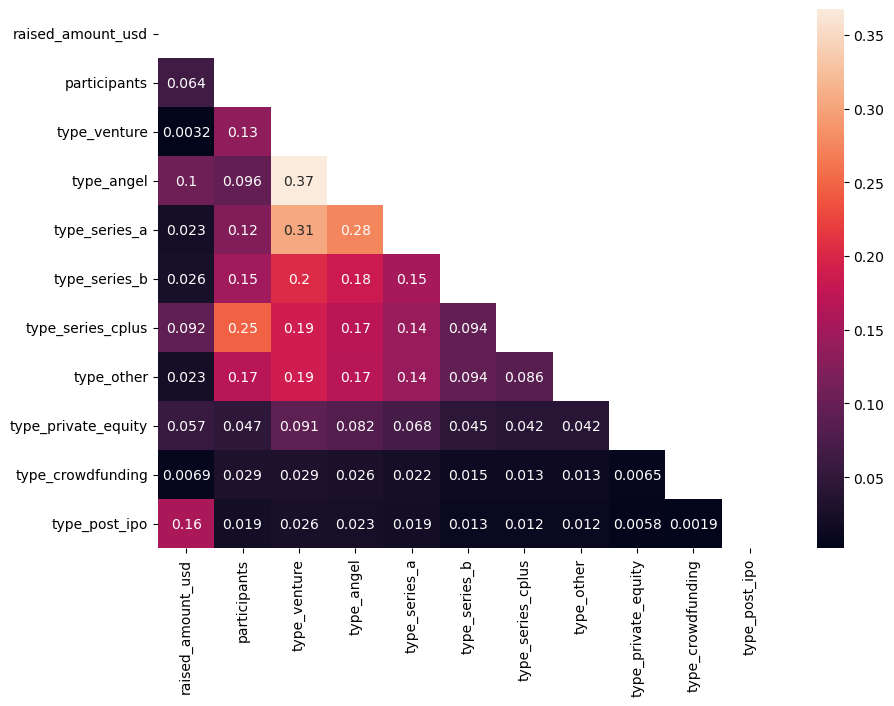

In [61]:
mat = funding_rounds[['raised_amount_usd','participants','type_venture','type_angel','type_series_a','type_series_b','type_series_cplus'
,'type_other','type_private_equity','type_crowdfunding','type_post_ipo']].corr().abs()

mask = np.triu(np.ones_like(mat, dtype=bool))
mat_masked = mat.mask(mask) 

fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(mat_masked, annot=True, ax=ax)
plt.show()

### Sentiment analysis/worclouds

In [62]:
# Function for creating wordclouds
def wordcloud(text,color):

    # Creating the TF-IDF scores 
    tf_idf_vect = TfidfVectorizer(stop_words ='english')
    X_train_tf_idf = tf_idf_vect.fit_transform(text)
    terms = tf_idf_vect.get_feature_names_out()
    dense = X_train_tf_idf.todense()
    dlist = dense.tolist()
    tf_df = pd.DataFrame(dlist,columns=terms)

    #tf_df = tf_df.drop(columns=stopword)


    #Creating the vectors
    df_vector = tf_df.T.sum(axis=1)
    
    # create a mask based on the star image
    #my_mask = np.array(Image.open('star.jpg'))
    # create a wordcloud 
    wc = WordCloud(background_color='black', max_words = 50,
               #mask=my_mask,
               collocations=False,
               width=600,
               height=300,colormap=color,   
               contour_width=3,
               contour_color='black')
    
 

    #Plotting the wordclouds
    Cloud = wc.generate_from_frequencies(df_vector)
    
    return Cloud

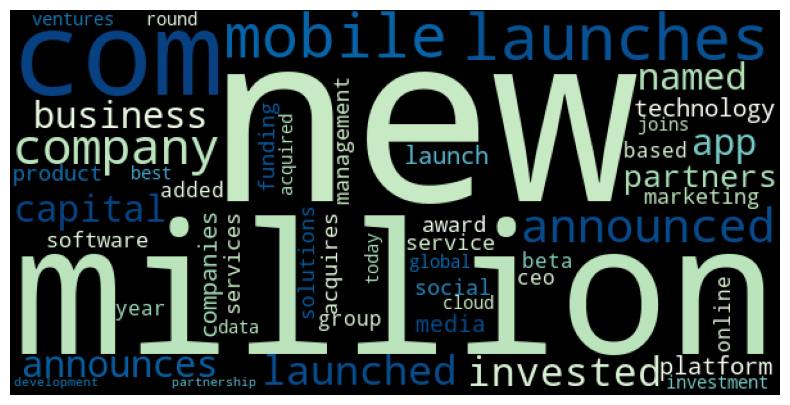

In [63]:
# Plotting wordcloud
full_wordcloud = wordcloud(opr_text,'GnBu_r')
plt.figure(figsize=(10, 5))
plt.imshow(full_wordcloud)
#plt.title("Reviews")
plt.axis("off")
plt.show()

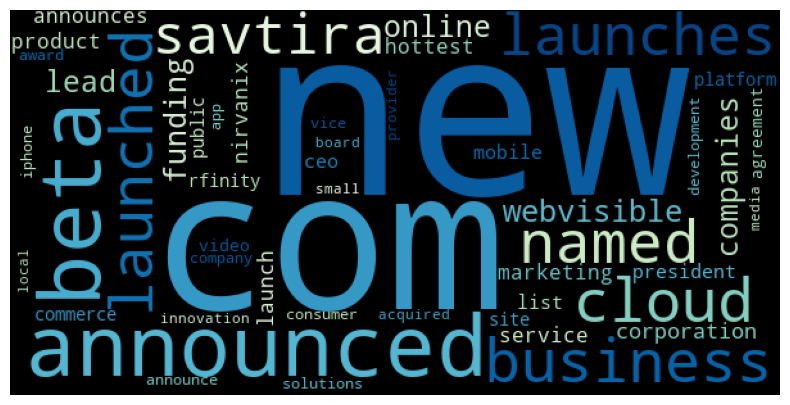

In [64]:
# Plotting wordcloud
full_wordcloud = wordcloud(closed_text,'GnBu')
plt.figure(figsize=(10, 5))
plt.imshow(full_wordcloud)
#plt.title("Reviews")
plt.axis("off")
plt.show()

In [65]:
# Creating sentiment scores 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
text_data['polarity'] = text_data['clean_decription'].apply(lambda review: sid.polarity_scores(review))

ModuleNotFoundError: No module named 'vaderSentiment'

In [ ]:
# Creating a new dataframe where the sentiment score is added "neg", "neu", "pos" og "compound"
sentiment_df = pd.concat(
    [text_data.drop(['milestone_at', 'milestone_code', 'polarity'], axis=1), 
     text_data['polarity'].apply(pd.Series)], axis=1)
sentiment_df

,object_id,description,status,category_code,clean_decription,neg,neu,pos,compound
0,c:12,Survives iPhone 3G Stevenote,ipo,social,survives iphone stevenote,0.000,1.000,0.000,0.0000
2,c:59,More than 4 Billion videos viewed at Google Si...,ipo,search,more than billion videos viewed at google site...,0.000,1.000,0.000,0.0000
3,c:314,Reddit goes Open Source,acquired,web,reddit goes open source,0.000,1.000,0.000,0.0000
4,c:314,Adds the ability to create your own Reddits,acquired,web,adds the ability to create your own reddits,0.000,0.577,0.423,0.5267
5,c:283,"Adobe announced new content from MTV Networks,...",ipo,software,adobe announced new content from mtv networks ...,0.000,0.937,0.063,0.3612
...,...,...,...,...,...,...,...,...,...
39444,f:15095,\nCapitalWorks brings Avtron Aerospace into it...,operating,NaN,capitalworks brings avtron aerospace into its ...,0.000,1.000,0.000,0.0000
39449,c:260812,ManyShip is showcased at the Berkeley Entrepre...,operating,NaN,manyship is showcased at the berkeley entrepre...,0.000,0.787,0.213,0.6908
39452,c:59519,miiCard builds on recent momentum and vision f...,operating,security,miicard builds on recent momentum and vision f...,0.000,0.882,0.118,0.2500
39454,f:4101,Odyssey Investment Partners set to hit $2 bln ...,operating,NaN,odyssey investment partners set to hit bln har...,0.113,0.887,0.000,-0.1027


In [ ]:
# Creating a column classifying the sentiment reviews as positive, neutral or negative. 
sentiment_df['sentiment'] = sentiment_df['compound'].apply(lambda x: 'Positive' if x >0 else 'Neutral' if x==0 else 'Negative')

In [ ]:
# Sentiment distribution 
sentiment_df['sentiment'].value_counts()

Neutral     11537
Positive     7815
Negative      690
Name: sentiment, dtype: int64